# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress

import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset.  
study_data_complete = pd.merge(study_results,mouse_metadata,  how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29


In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Checking the number of mice.

mouse_count = mouse_metadata["Mouse ID"].nunique()
print(f"The number of unique mice {mouse_count} until this part")


The number of unique mice 249 until this part


In [5]:
study_data_complete.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicated = study_data_complete.duplicated(["Mouse ID","Timepoint"], keep=False)
duplicated_data = study_data_complete.loc[mouse_duplicated]
duplicated_mouse = duplicated_data["Mouse ID"].unique()
print(f"The  mouse ID duplicated is {duplicated_mouse}")

The  mouse ID duplicated is ['g989']


In [7]:
duplicated_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
duplicated_data.index

Int64Index([107, 137, 329, 360, 620, 681, 815, 869, 950, 1111], dtype='int64')

In [10]:
study_data_complete.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data =  study_data_complete.drop(index = duplicated_data.index)
clean_data.count()

Mouse ID              1883
Timepoint             1883
Tumor Volume (mm3)    1883
Metastatic Sites      1883
Drug Regimen          1883
Sex                   1883
Age_months            1883
Weight (g)            1883
dtype: int64

In [12]:
# Checking the number of mice in the clean DataFrame.
mouse_clean_data_count = clean_data["Mouse ID"].nunique()
print(f"The number of unique mice {mouse_clean_data_count}")

The number of unique mice 249


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


per_regimen_mean = clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
per_regimen_median = clean_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
per_regimen_variance = clean_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
per_regimen_std = clean_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
per_regimen_sem = clean_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean Tumor Volume": per_regimen_mean,
    "Median Tumor Volume": per_regimen_median,
    "Tumor Volume Variance": per_regimen_variance,
    "Tumor Volume Std. Dev.": per_regimen_std,
    "Tumor Volume Std. Err": per_regimen_sem
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# pdte
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# first, create a  new dataframe just the columns with neeed
second_opcion_df = clean_data.loc[:,["Drug Regimen","Tumor Volume (mm3)"]]

# Using the aggregation method, produce the same summary statistics in a single line.
result_df = second_opcion_df.groupby(["Drug Regimen"]).aggregate(['mean', 'median','var','std','sem'])

result_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

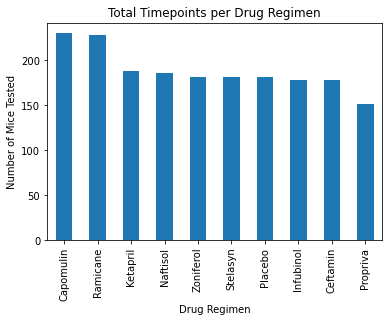

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

number_timepoints_df = clean_data.groupby(["Drug Regimen"]).count()["Timepoint"].sort_values(ascending=False)
timepoints_graph = number_timepoints_df.plot(kind="bar", title = "Total Timepoints per Drug Regimen")
timepoints_graph.set_xlabel("Drug Regimen")
timepoints_graph.set_ylabel("Number of Mice Tested")

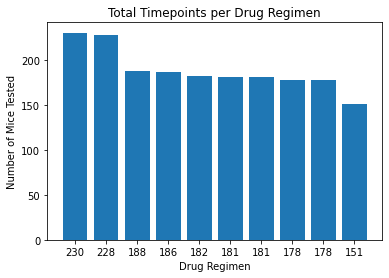

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

number_timepoints_df = clean_data.groupby(["Drug Regimen"]).count()["Timepoint"].sort_values(ascending=False)
# create range of the same size between its two parameters
x_df = np.arange(0,len(number_timepoints_df))
plt.bar(x_df,number_timepoints_df)
ticks = [x for x in x_df]
plt.xticks(ticks,number_timepoints_df)
plt.title("Total Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


In [17]:
clean_data.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29


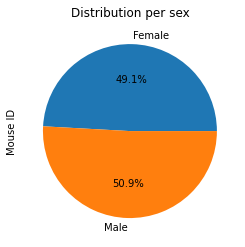

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
per_sex_mice = clean_data.groupby(["Sex"]).count()["Mouse ID"]
sex_graph = per_sex_mice.plot(kind="pie",autopct='%1.1f%%', title = "Distribution per sex")


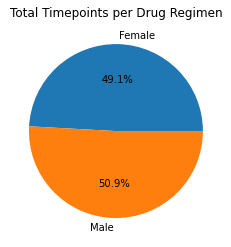

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
per_sex_mice = clean_data.groupby(["Sex"]).count()["Mouse ID"]
plt.pie(per_sex_mice,autopct='%1.1f%%',labels=["Female","Male"])
plt.title("Total Timepoints per Drug Regimen")
plt.show()


In [20]:
treatments_data_df  = clean_data[clean_data["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
                                 
reduced_treatments_df = pd.DataFrame({"Mouse ID" : treatments_data_df["Mouse ID"],
                               "Timepoint" : treatments_data_df["Timepoint"]})
reduced_treatments_df.head(2)

,Mouse ID,Timepoint
0,b128,0
29,c326,0


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments_data_df  = clean_data[clean_data["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
reduced_treatments_df = pd.DataFrame({"Mouse ID" : treatments_data_df["Mouse ID"],
                               "Timepoint" : treatments_data_df["Timepoint"]})


# Start by getting the last (greatest) timepoint for each mouse
reduced_treatments_df.sort_values("Mouse ID", ascending=True)
reduced_treatments_df.groupby(["Mouse ID"]).max()["Timepoint"]


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

reduced_treatments_all_df = pd.merge(reduced_treatments_df,clean_data,  how="left", on=["Mouse ID", "Timepoint"])
reduced_treatments_all_df.sort_values("Drug Regimen", ascending=True)
reduced_treatments_all_df.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,c326,0,45.0,0,Infubinol,Female,18,25


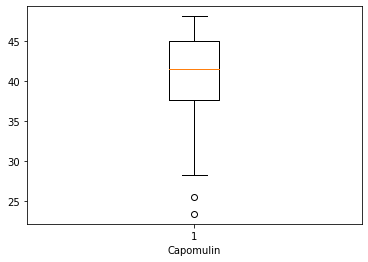

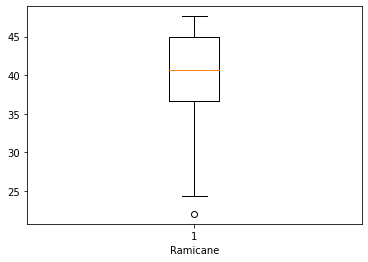

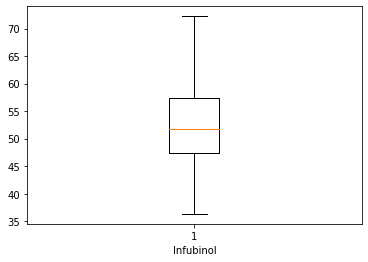

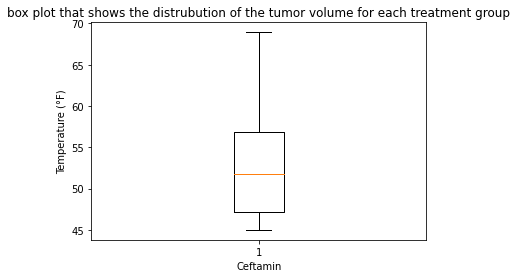

In [22]:

# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

for treatment in treatment_list:
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    df_all = reduced_treatments_all_df[(reduced_treatments_all_df["Drug Regimen"] == treatment)]
    
    fig1, ax1 = plt.subplots()
    ax1.boxplot(df_all["Tumor Volume (mm3)"])
    ax1.set_xlabel(treatment)
    
ax1.set_title('box plot that shows the distrubution of the tumor volume for each treatment group')
ax1.set_ylabel('Temperature (°F)')
plt.show()

## Line and Scatter Plots

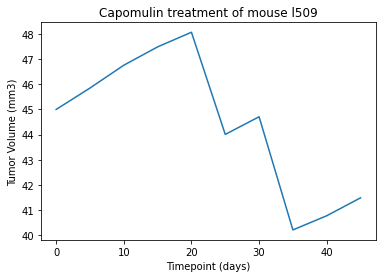

In [24]:
# pdte preg x q no se pinta la ecuacion en grafica
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Select data from mouse ID --> "l509" 

mouse_data_df  = clean_data[(clean_data["Mouse ID"] == "l509")]
reduced_mouse_df = pd.DataFrame({"Average Tumor Volume (mm3)" : mouse_data_df["Tumor Volume (mm3)"],
                                "Timepoint" : mouse_data_df["Timepoint"],
                               "Weight (g)" : mouse_data_df["Weight (g)"]})

# Create a graph 
plt.plot(reduced_mouse_df["Timepoint"], reduced_mouse_df["Average Tumor Volume (mm3)"])
# set the labels and titlle
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
# Show the graph that we have created
plt.show()



In [25]:
treatments_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
29,c326,0,45.000000,0,Infubinol,Female,18,25
30,c139,0,45.000000,0,Infubinol,Male,11,28
31,v339,0,45.000000,0,Infubinol,Male,20,26
32,a577,0,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17


In [26]:
clean_data.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

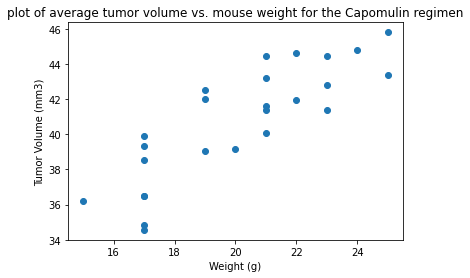

In [27]:
# pdte, posiblemente exista una reducción de los datos desde arriba (porque aqui me salen muchos datos)
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_data_df  = clean_data[(clean_data["Drug Regimen"] == "Capomulin")]
reduced_Capomulin_df = pd.DataFrame({"Mouse ID" : Capomulin_data_df["Mouse ID"],
                                "Tumor Volume (mm3)" : Capomulin_data_df["Tumor Volume (mm3)"],
                               "Weight (g)" : Capomulin_data_df["Weight (g)"]})

reduced_Capomulin_df.sort_values("Weight (g)", ascending=True)
reduced_Capomulin_new_df = reduced_Capomulin_df.groupby(["Mouse ID","Weight (g)"]).mean()["Tumor Volume (mm3)"].to_frame().reset_index()

# Create a graph 
plt.scatter(reduced_Capomulin_new_df["Weight (g)"], reduced_Capomulin_new_df["Tumor Volume (mm3)"])
# set the labels and titlle
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("plot of average tumor volume vs. mouse weight for the Capomulin regimen")
# Show the graph that we have created
plt.show()

In [28]:
line_eq

NameError: name 'line_eq' is not defined

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Add the linear regression equation and line to plot
x_values = reduced_Capomulin_new_df['Weight (g)']
y_values = reduced_Capomulin_new_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.title(f"The correlation between mouse weight and the average tumor volume is {str(round(slope,2))}")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()